### Black Friday Sales Analysis and Prediction

---

*Submitted by -*
*Ipseeta Deka, Mrinal Ashok Bageshwari, Niharika Yogesh Apte*

---


# **Step 1: Importing libraries and loading the data**





In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#reading the file
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [ ]:
bf_data = pd.read_csv("train.csv") #storing train.csv in a dataframe

#**Step 2: Data Cleaning**


Previewing the data

In [ ]:
print(bf_data.head()) 


   User_ID Product_ID Gender  ... Product_Category_2  Product_Category_3 Purchase
0  1000001  P00069042      F  ...                NaN                 NaN     8370
1  1000001  P00248942      F  ...                6.0                14.0    15200
2  1000001  P00087842      F  ...                NaN                 NaN     1422
3  1000001  P00085442      F  ...               14.0                 NaN     1057
4  1000002  P00285442      M  ...                NaN                 NaN     7969

[5 rows x 12 columns]


Previewing the datatypes

In [ ]:
bf_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


There are null values in Product_Category_2 and Product_Category_3

In [ ]:
bf_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


The mean value of Product_Category_2 is 9.842329 and of Product_Category_3 is 12.668243

Hence, we will use these values to fill the missing values



In [ ]:
pip install scikit-learn==0.19.1 

     |████████████████████████████████| 12.4MB 5.2MB/s 
ERROR: yellowbrick 0.9.1 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.1 which is incompatible.
ERROR: umap-learn 0.4.6 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.1 which is incompatible.
ERROR: imbalanced-learn 0.4.3 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.1 which is incompatible.
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


Handling the missing values

In [ ]:

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(bf_data.iloc[:, 9:11].values)
bf_data.iloc[:,9:11] = imputer.transform(bf_data.iloc[:, 9:11].values)
bf_data.info() 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Dropping unnecessary columns 

In [ ]:
bf_data.drop(['User_ID','Product_ID'], axis=1, inplace=True)
bf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


# **Step 3: Exploratory data analysis**

Observing the purchase behaviour with respect to Age Group

In [ ]:
bf_data["Age"] = bf_data["Age"].astype('category')

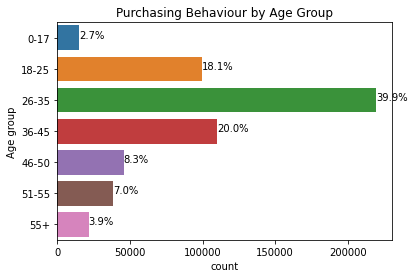

In [ ]:
ax = sns.countplot(y="Age", data=bf_data)
plt.title('Purchasing Behaviour by Age Group')
plt.ylabel('Age group')

total = len(bf_data['Age'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

Observing the purchase behaviour with respect to Gender




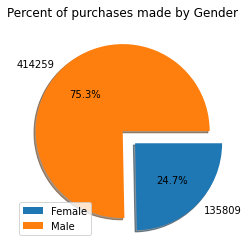

In [ ]:
unique_gender = bf_data.Gender.unique()

countF = bf_data[bf_data['Gender'] == 'F'].count() 
countM = bf_data[bf_data['Gender'] == 'M'].count() 

values= [countF.Gender,countM.Gender]
labels = ['Female', 'Male']
explode = (0.2, 0)
plt.pie(values, labels= values,explode=explode,autopct='%1.1f%%', radius=1, counterclock=False, shadow=True)
plt.title('Percent of purchases made by Gender')
plt.legend(labels,loc=3)
plt.show()

City wise sales trend

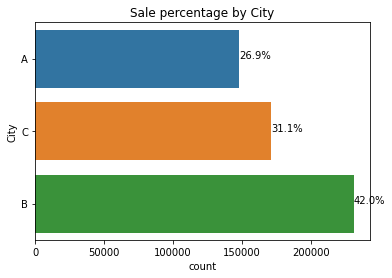

In [ ]:
ax = sns.countplot(y="City_Category", data=bf_data)
plt.title('Sale percentage by City')
plt.ylabel('City')

total = len(bf_data['City_Category'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

Best performing product category (in terms of revenue)

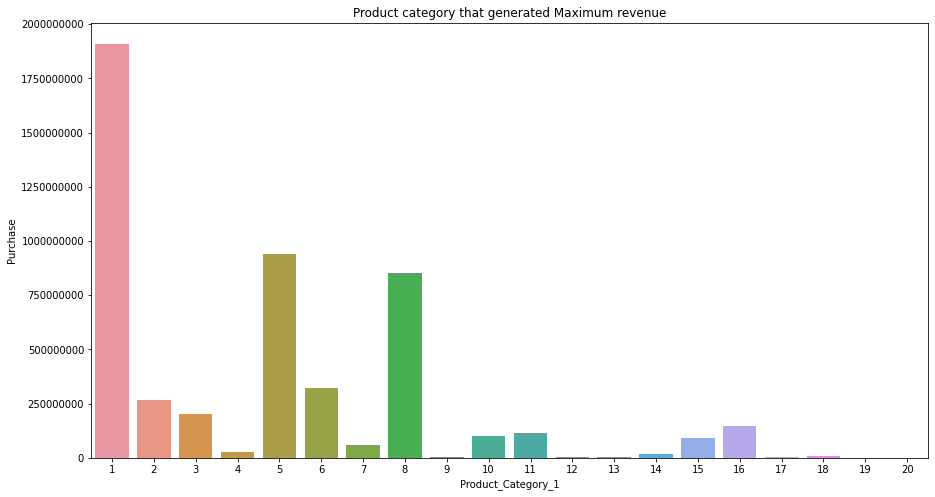

In [ ]:
productwise_revenue = bf_data.groupby(['Product_Category_1'])['Purchase'].sum().reset_index()

plt.figure(figsize=(15,8))
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.title('Product category that generated Maximum revenue')
ax = sns.barplot(x='Product_Category_1', y='Purchase',data=productwise_revenue)

Correlation mattrix of relevant features

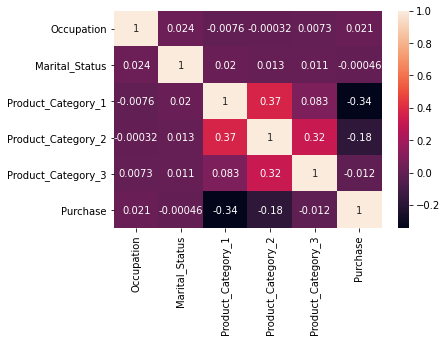

In [ ]:
sns.heatmap(
    bf_data.corr(),
    annot=True
)

# **Step 4: Data modelling and Prediction of Sales**

In [ ]:
X = bf_data.iloc[:, 0:9].values 
y = bf_data.iloc[:, 9].values #target variable
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train

array([['M', '26-35', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ['M', '26-35', 14, ..., 8, 17.0, 12.668243206790512],
       ['M', '18-25', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       ['F', '46-50', 15, ..., 5, 9.842329251122386, 12.668243206790512],
       ['M', '18-25', 4, ..., 2, 4.0, 12.668243206790512],
       ['M', '55+', 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

In [ ]:
y_train

array([ 8109, 10071,  2290, ...,  6991, 13251,  9905])

In [ ]:
X_test

array([['M', '18-25', 0, ..., 1, 6.0, 12.668243206790512],
       ['M', '51-55', 1, ..., 12, 9.842329251122386, 12.668243206790512],
       ['M', '26-35', 11, ..., 6, 8.0, 15.0],
       ...,
       ['M', '36-45', 0, ..., 1, 2.0, 16.0],
       ['M', '26-35', 7, ..., 1, 2.0, 9.0],
       ['M', '36-45', 11, ..., 6, 8.0, 10.0]], dtype=object)

In [ ]:
X_test

array([['M', '18-25', 0, ..., 1, 6.0, 12.668243206790512],
       ['M', '51-55', 1, ..., 12, 9.842329251122386, 12.668243206790512],
       ['M', '26-35', 11, ..., 6, 8.0, 15.0],
       ...,
       ['M', '36-45', 0, ..., 1, 2.0, 16.0],
       ['M', '26-35', 7, ..., 1, 2.0, 9.0],
       ['M', '36-45', 11, ..., 6, 8.0, 10.0]], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_train = LabelEncoder()
X_train

array([['M', '26-35', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ['M', '26-35', 14, ..., 8, 17.0, 12.668243206790512],
       ['M', '18-25', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       ['F', '46-50', 15, ..., 5, 9.842329251122386, 12.668243206790512],
       ['M', '18-25', 4, ..., 2, 4.0, 12.668243206790512],
       ['M', '55+', 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

In [ ]:
X_train[:, 0] = labelencoder_X_train.fit_transform(X_train[:, 0])
X_train

array([[1, '26-35', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       [1, '26-35', 14, ..., 8, 17.0, 12.668243206790512],
       [1, '18-25', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       [0, '46-50', 15, ..., 5, 9.842329251122386, 12.668243206790512],
       [1, '18-25', 4, ..., 2, 4.0, 12.668243206790512],
       [1, '55+', 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

In [ ]:
X_train[:, 1] = labelencoder_X_train.fit_transform(X_train[:, 1])
X_train

array([[1, 2, 7, ..., 8, 9.842329251122386, 12.668243206790512],
       [1, 2, 14, ..., 8, 17.0, 12.668243206790512],
       [1, 1, 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       [0, 4, 15, ..., 5, 9.842329251122386, 12.668243206790512],
       [1, 1, 4, ..., 2, 4.0, 12.668243206790512],
       [1, 6, 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

In [ ]:
X_train[:, 3] = labelencoder_X_train.fit_transform(X_train[:, 3])
X_train

array([[1, 2, 7, ..., 8, 9.842329251122386, 12.668243206790512],
       [1, 2, 14, ..., 8, 17.0, 12.668243206790512],
       [1, 1, 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       [0, 4, 15, ..., 5, 9.842329251122386, 12.668243206790512],
       [1, 1, 4, ..., 2, 4.0, 12.668243206790512],
       [1, 6, 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

In [ ]:
X_train[:, 4] = labelencoder_X_train.fit_transform(X_train[:, 4])
X_train

array([[1, 2, 7, ..., 8, 9.842329251122386, 12.668243206790512],
       [1, 2, 14, ..., 8, 17.0, 12.668243206790512],
       [1, 1, 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       [0, 4, 15, ..., 5, 9.842329251122386, 12.668243206790512],
       [1, 1, 4, ..., 2, 4.0, 12.668243206790512],
       [1, 6, 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

In [ ]:
labelencoder_X_test = LabelEncoder()
X_test

array([['M', '18-25', 0, ..., 1, 6.0, 12.668243206790512],
       ['M', '51-55', 1, ..., 12, 9.842329251122386, 12.668243206790512],
       ['M', '26-35', 11, ..., 6, 8.0, 15.0],
       ...,
       ['M', '36-45', 0, ..., 1, 2.0, 16.0],
       ['M', '26-35', 7, ..., 1, 2.0, 9.0],
       ['M', '36-45', 11, ..., 6, 8.0, 10.0]], dtype=object)

In [ ]:
X_test[:, 0] = labelencoder_X_test.fit_transform(X_test[:, 0])
X_test

array([[1, '18-25', 0, ..., 1, 6.0, 12.668243206790512],
       [1, '51-55', 1, ..., 12, 9.842329251122386, 12.668243206790512],
       [1, '26-35', 11, ..., 6, 8.0, 15.0],
       ...,
       [1, '36-45', 0, ..., 1, 2.0, 16.0],
       [1, '26-35', 7, ..., 1, 2.0, 9.0],
       [1, '36-45', 11, ..., 6, 8.0, 10.0]], dtype=object)

In [ ]:
X_test[:, 1] = labelencoder_X_test.fit_transform(X_test[:, 1])
X_test

array([[1, 1, 0, ..., 1, 6.0, 12.668243206790512],
       [1, 5, 1, ..., 12, 9.842329251122386, 12.668243206790512],
       [1, 2, 11, ..., 6, 8.0, 15.0],
       ...,
       [1, 3, 0, ..., 1, 2.0, 16.0],
       [1, 2, 7, ..., 1, 2.0, 9.0],
       [1, 3, 11, ..., 6, 8.0, 10.0]], dtype=object)

In [ ]:
X_test[:, 3] = labelencoder_X_test.fit_transform(X_test[:, 3])
X_test

array([[1, 1, 0, ..., 1, 6.0, 12.668243206790512],
       [1, 5, 1, ..., 12, 9.842329251122386, 12.668243206790512],
       [1, 2, 11, ..., 6, 8.0, 15.0],
       ...,
       [1, 3, 0, ..., 1, 2.0, 16.0],
       [1, 2, 7, ..., 1, 2.0, 9.0],
       [1, 3, 11, ..., 6, 8.0, 10.0]], dtype=object)

In [ ]:
X_test[:, 4] = labelencoder_X_test.fit_transform(X_test[:, 4])
X_test

array([[1, 1, 0, ..., 1, 6.0, 12.668243206790512],
       [1, 5, 1, ..., 12, 9.842329251122386, 12.668243206790512],
       [1, 2, 11, ..., 6, 8.0, 15.0],
       ...,
       [1, 3, 0, ..., 1, 2.0, 16.0],
       [1, 2, 7, ..., 1, 2.0, 9.0],
       [1, 3, 11, ..., 6, 8.0, 10.0]], dtype=object)

Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
Y_pred_lin_reg = lin_reg.predict(X_test)

In [ ]:
Y_pred_lin_reg

array([11657.09932461,  6588.86527387,  9806.93668029, ...,
       12138.94444681, 11441.16364767,  9175.36418007])

KNN Regression Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [ ]:

Y_pred_knn = knn.predict(X_test)

In [ ]:
Y_pred_knn

array([ 9599.4,  3141.6, 17181.6, ..., 16414.8, 13276.4, 13073.8])

Decision Tree Regression Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)
Y_pred_dt = dt.predict(X_test)
Y_pred_dt

array([15688.5 ,  1574.25, 12571.  , ..., 16284.5 , 14820.4 ,  8262.  ])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
print("Linear Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, Y_pred_lin_reg)))
print("R2 score:", r2_score(y_test, Y_pred_lin_reg))

Linear Regression: 
RMSE: 4691.873758525342
R2 score: 0.12824198819373678


In [ ]:
print("KNN regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, Y_pred_knn)))
print("R2 score:", r2_score(y_test, Y_pred_knn))

KNN regression: 
RMSE: 3225.634594618368
R2 score: 0.5879654375213608


In [ ]:
print("Decision tree regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, Y_pred_dt)))
print("R2 score:", r2_score(y_test, Y_pred_dt))

Decision tree regression: 
RMSE: 3318.6680240555784
R2 score: 0.563854965391567


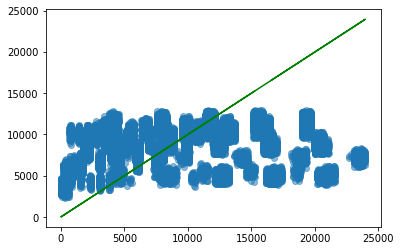

In [ ]:
plt.scatter(y_test, Y_pred_lin_reg, alpha=0.5)
plt.plot(y_test, y_test,color='green')

We notice that Linear Regression Model fails entirely when the sales go above 15000.

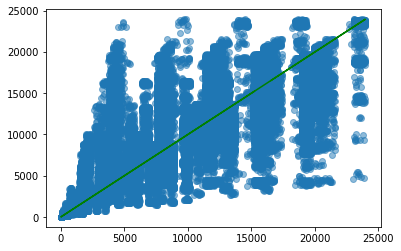

In [ ]:
plt.scatter(y_test, Y_pred_dt, alpha=0.5)
plt.plot(y_test, y_test,color='green')

Decision Tree Regression performs significantly better than Linear Regression also it does not fail as sales rise. 

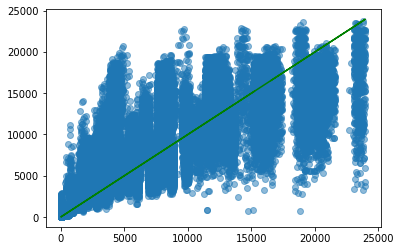

In [ ]:
plt.scatter(y_test, Y_pred_knn, alpha=0.5)
plt.plot(y_test, y_test,color='green')

KNN Regression performs similar to Decision Tree Regression Model but RMSE is slightly better and hence this is the most suitable model.